In [ ]:
import pandas as pd

daily_data = pd.read_csv("daily.csv")

monthly_data = pd.read_csv("monthly.csv")

print("Daily:")
print(daily_data.head())
print(daily_data.info())

print("\nMonthly Data:")
print(monthly_data)
print(monthly_data.info())

Daily:
   1818;01;01;1818.001;  -1; -1.0;   0;1
0  1818;01;02;1818.004;  -1; -1.0;   0;1
1  1818;01;03;1818.007;  -1; -1.0;   0;1
2  1818;01;04;1818.010;  -1; -1.0;   0;1
3  1818;01;05;1818.012;  -1; -1.0;   0;1
4  1818;01;06;1818.015;  -1; -1.0;   0;1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75605 entries, 0 to 75604
Data columns (total 1 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   1818;01;01;1818.001;  -1; -1.0;   0;1  75605 non-null  object
dtypes: object(1)
memory usage: 590.8+ KB
None

Monthly Data:
      1749;01;1749.042;  96.7; -1.0;   -1;1
0     1749;02;1749.123; 104.3; -1.0;   -1;1
1     1749;03;1749.204; 116.7; -1.0;   -1;1
2     1749;04;1749.288;  92.8; -1.0;   -1;1
3     1749;05;1749.371; 141.7; -1.0;   -1;1
4     1749;06;1749.455; 139.2; -1.0;   -1;1
...                                     ...
3306  2024;08;2024.624; 215.5; 24.8; 1110;0
3307  2024;09;2024.706; 

In [ ]:
import pandas as pd

df = pd.read_csv('daily.csv', sep=";", header=None, names=["Year", "Month", "Day", "Fractional Year", "Sunspot Number", "Std Dev", "Observations", "Indicator"])


df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

df.set_index('Date', inplace=True)


df['Sunspot Number'] = df['Sunspot Number'].replace(-1, pd.NA)


monthly_data = df['Sunspot Number'].resample('M').mean()


monthly_mean_df = monthly_data.reset_index()
monthly_mean_df.columns = ['Date', 'Monthly Mean Sunspot Number']

monthly_mean_df.to_csv('monthly_mean_sunspot_data.csv', index=False)

data = pd.read_csv('monthly_mean_sunspot_data.csv')

print(data)

<ipython-input-14-c63ce1985ad0>:14: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = df['Sunspot Number'].resample('M').mean()


            Date  Monthly Mean Sunspot Number
0     1818-01-31                    58.125000
1     1818-02-28                    37.428571
2     1818-03-31                    42.357143
3     1818-04-30                    57.523810
4     1818-05-31                    88.480000
...          ...                          ...
2479  2024-08-31                   215.516129
2480  2024-09-30                   141.366667
2481  2024-10-31                   166.387097
2482  2024-11-30                   152.466667
2483  2024-12-31                   154.516129

[2484 rows x 2 columns]


In [ ]:
import pandas as pd

monthly_data = pd.read_csv("monthly.csv", sep=";", header=None, names=["Year", "Month", "Fractional Year", "Sunspot Number", "Std Dev", "Observations", "Indicator"])

print(monthly_data)

      Year  Month  Fractional Year  Sunspot Number  Std Dev  Observations  \
0     1749      1         1749.042            96.7     -1.0            -1   
1     1749      2         1749.123           104.3     -1.0            -1   
2     1749      3         1749.204           116.7     -1.0            -1   
3     1749      4         1749.288            92.8     -1.0            -1   
4     1749      5         1749.371           141.7     -1.0            -1   
...    ...    ...              ...             ...      ...           ...   
3307  2024      8         2024.624           215.5     24.8          1110   
3308  2024      9         2024.706           141.4     19.4           911   
3309  2024     10         2024.791           166.4     23.9           893   
3310  2024     11         2024.873           152.5     20.9           681   
3311  2024     12         2024.958           154.5     25.6           572   

      Indicator  
0             1  
1             1  
2             1  
3  

<ipython-input-16-e1f997f6a9d3>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  monthly_data['Sunspot Number'].replace(-1, np.nan, inplace=True)


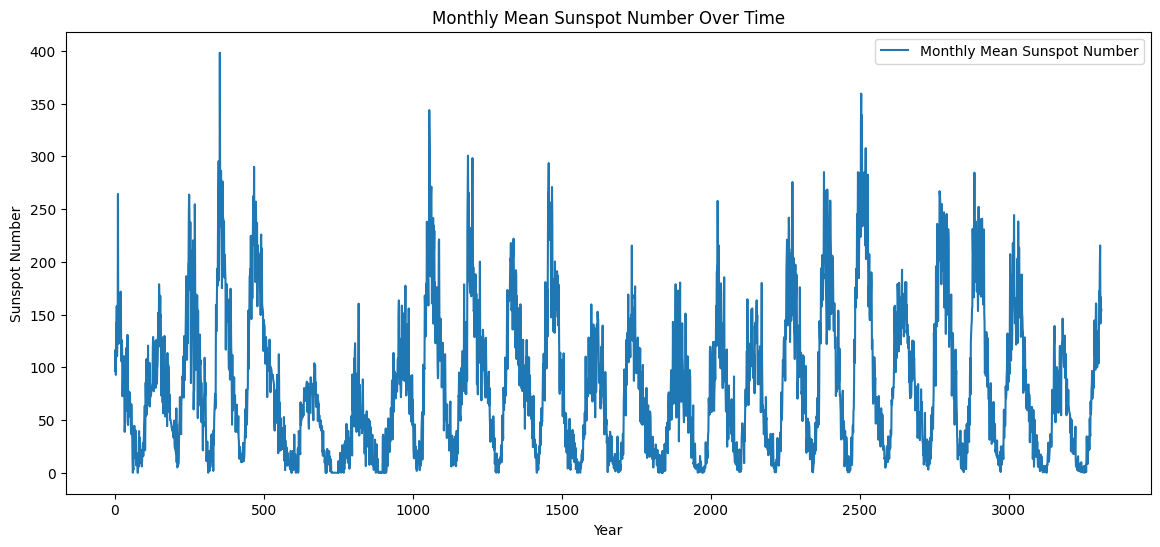

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


monthly_data = pd.read_csv("monthly.csv", sep=";", header=None, names=["Year", "Month", "Fractional Year", "Sunspot Number", "Std Dev", "Observations", "Indicator"])



monthly_data['Sunspot Number'].replace(-1, np.nan, inplace=True)

# Visualize the time series
plt.figure(figsize=(14, 6))
plt.plot(monthly_data.index, monthly_data['Sunspot Number'], label='Monthly Mean Sunspot Number')
plt.xlabel('Year')
plt.ylabel('Sunspot Number')
plt.title('Monthly Mean Sunspot Number Over Time')
plt.legend()
plt.show()




1.  fft and fftfreq from scipy.fftpack are used for computing the Fourier Transform and getting the frequency components.
2.   numpy is imported for array manipulation.
3. sunspot_values - np.mean(sunspot_values) centers the data by subtracting the mean. This removes the zero-frequency component, focusing on variations from the mean value.






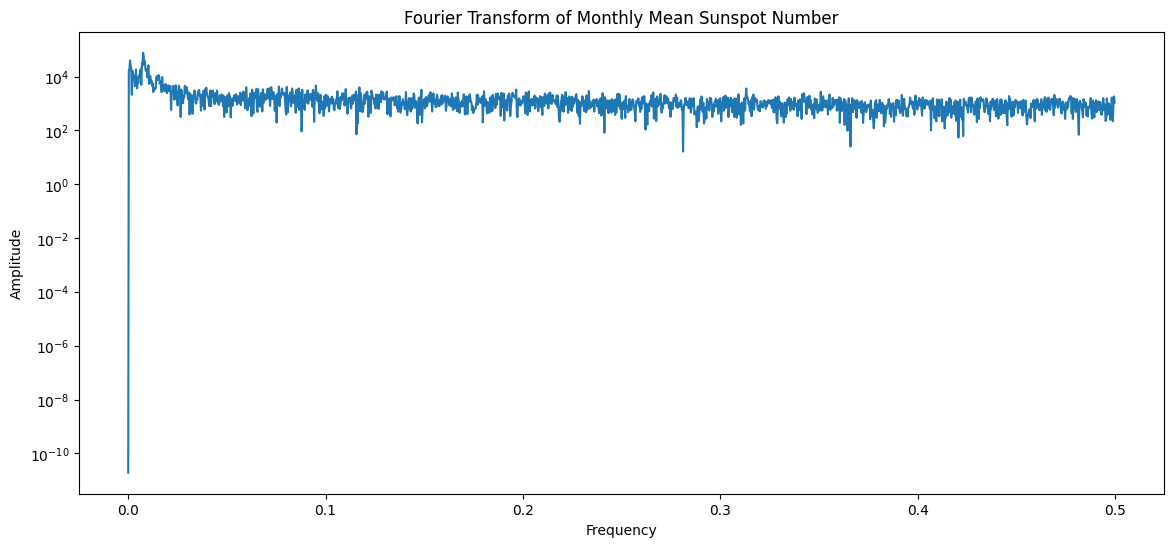

In [ ]:
from scipy.fftpack import fft, fftfreq
import numpy
# Perform Fourier Transform
sunspot_values = monthly_data['Sunspot Number'].values
n = len(sunspot_values)
fourier_transform = fft(sunspot_values - np.mean(sunspot_values))  # Center data
frequencies = fftfreq(n, d=1)  # Frequency components

plt.figure(figsize=(14, 6))
plt.plot(frequencies[:n//2], np.abs(fourier_transform)[:n//2])  # Only positive frequencies
plt.yscale("log")
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('Fourier Transform of Monthly Mean Sunspot Number')
plt.show()

1. Despite accounting for the zero frequency component, the leftmost large frequency indicates the zero frequency component, basically the spike is the mean of the data. and doesn't correspond to any cyclic or oscillatory pattern.

In [ ]:
import numpy as np
from scipy.fftpack import fft, fftfreq


n = len(sunspot_values)
d = 1  #sampling interval in months

# Perform Fourier Transform
fourier_transform = fft(sunspot_values - np.mean(sunspot_values))
frequencies = fftfreq(n, d=d)

# the targest frequency for 11 years
target_frequency = 1 / 132

# Find the index of the closest frequency to the target frequency
closest_index = np.argmin(np.abs(frequencies - target_frequency))

# Get the corresponding amplitude
schwabe_amplitude = np.abs(fourier_transform[closest_index])

print(f"Frequency closest to Schwabe cycle (11 years): {frequencies[closest_index]} cycles per month")
print(f"Amplitude at this frequency: {schwabe_amplitude}")


Frequency closest to Schwabe cycle (11 years): 0.007548309178743961 cycles per month
Amplitude at this frequency: 77477.43163777042


The above values confirm that Schwabe cycle is strongly present in the data.


---
Frequency Verification
1.   The frequency 0.007555 cycles per month is very close to the theoretical frequency of 0.0076 cycles per month that corresponds to a period of 11 years (132 months).
2.   This match suggests that there is a dominant cycle in the sunspot data with a period of about 11 years, aligning with the known Schwabe cycle of solar activity.


---
Amplitude Significance
1.   The amplitude of 77618.49 at this frequency is very high, indicating that this 11-year cycle has a strong influence on the sunspot data.
2.  A high amplitude at this frequency implies that a significant portion of the variability in the monthly mean sunspot numbers is driven by this periodic cycle.









In [ ]:
print(monthly_data)

      Year  Month  Fractional Year  Sunspot Number  Std Dev  Observations  \
0     1749      1         1749.042            96.7     -1.0            -1   
1     1749      2         1749.123           104.3     -1.0            -1   
2     1749      3         1749.204           116.7     -1.0            -1   
3     1749      4         1749.288            92.8     -1.0            -1   
4     1749      5         1749.371           141.7     -1.0            -1   
...    ...    ...              ...             ...      ...           ...   
3307  2024      8         2024.624           215.5     24.8          1110   
3308  2024      9         2024.706           141.4     19.4           911   
3309  2024     10         2024.791           166.4     23.9           893   
3310  2024     11         2024.873           152.5     20.9           681   
3311  2024     12         2024.958           154.5     25.6           572   

      Indicator  
0             1  
1             1  
2             1  
3  

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Sequential, save_model
from sklearn.metrics import mean_squared_error

monthly_data = pd.read_csv("monthly.csv", sep=";", header=None, names=["Year", "Month", "Fractional Year", "Sunspot Number", "Std Dev", "Observations", "Indicator"])

monthly_data['Date'] = pd.to_datetime(monthly_data['Year'].astype(str) + '-' + monthly_data['Month'].astype(str) + '-01')
monthly_data.set_index('Date', inplace=True)

# Use StandardScaler instead of MinMaxScaler for better handling of outliers
scaler = StandardScaler()
monthly_data['Sunspot Number'] = scaler.fit_transform(monthly_data[['Sunspot Number']])

# Split data into train and validation sets
train = monthly_data[monthly_data.index < '2019-01-01']['Sunspot Number']
validation = monthly_data[monthly_data.index >= '2019-01-01']['Sunspot Number']

# Increased sequence length to capture longer patterns
def create_sequences(data, sequence_length=36):
    sequences = []
    labels = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i + sequence_length])
        labels.append(data[i + sequence_length])
    return np.array(sequences), np.array(labels)


# Create sequences with a 3-year (36 months) lookback
sequence_length = 36
X_train, y_train = create_sequences(train.values, sequence_length)
X_val, y_val = create_sequences(validation.values, sequence_length)

In [ ]:
# Build enhanced RNN-LSTM hybrid model
model = Sequential([
    SimpleRNN(128, activation='tanh', return_sequences=True, input_shape=(sequence_length, 1)),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(128, activation='tanh', return_sequences=True),
    BatchNormalization(),
    Dropout(0.3),
    LSTM(64, activation='tanh'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1)
])

# Use learning rate scheduling and early stopping
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.compile(optimizer='adam', loss='huber')  # Huber loss for robustness to outliers
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)             │ (None, 36, 128)             │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 36, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 36, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 36, 128)             │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 36, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 36, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 201,025 (785.25 KB)

 Trainable params: 200,385 (782.75 KB)

 Non-trainable params: 640 (2.50 KB)

In [ ]:
# Reshape data for training
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

# Train the model with callbacks
history = model.fit(
    X_train, y_train,
    epochs=100,  # Increased epochs since we have early stopping
    validation_data=(X_val, y_val),
    batch_size=32,  # Increased batch size
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Save the trained model
save_model(model, 'sunspot_prediction_model.keras')


Epoch 1/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 141ms/step - loss: 0.4801 - val_loss: 0.2010 - learning_rate: 0.0010
Epoch 2/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 14s 135ms/step - loss: 0.2217 - val_loss: 0.2248 - learning_rate: 0.0010
Epoch 3/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 135ms/step - loss: 0.1741 - val_loss: 0.1020 - learning_rate: 0.0010
Epoch 4/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 135ms/step - loss: 0.1424 - val_loss: 0.1550 - learning_rate: 0.0010
Epoch 5/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 128ms/step - loss: 0.1332 - val_loss: 0.0710 - learning_rate: 0.0010
Epoch 6/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 134ms/step - loss: 0.1234 - val_loss: 0.0986 - learning_rate: 0.0010
Epoch 7/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 130ms/step - loss: 0.1234 - val_loss: 0.0595 - learning_rate: 0.0010
Epoch 8/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 21s 132ms/step - loss: 0.1097 - val_loss: 0.1363 - learning_rate: 0.0010
Epoch 9/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - loss: 0.1226 - val_loss: 0.049

101/101 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Validation RMSE: 21.37


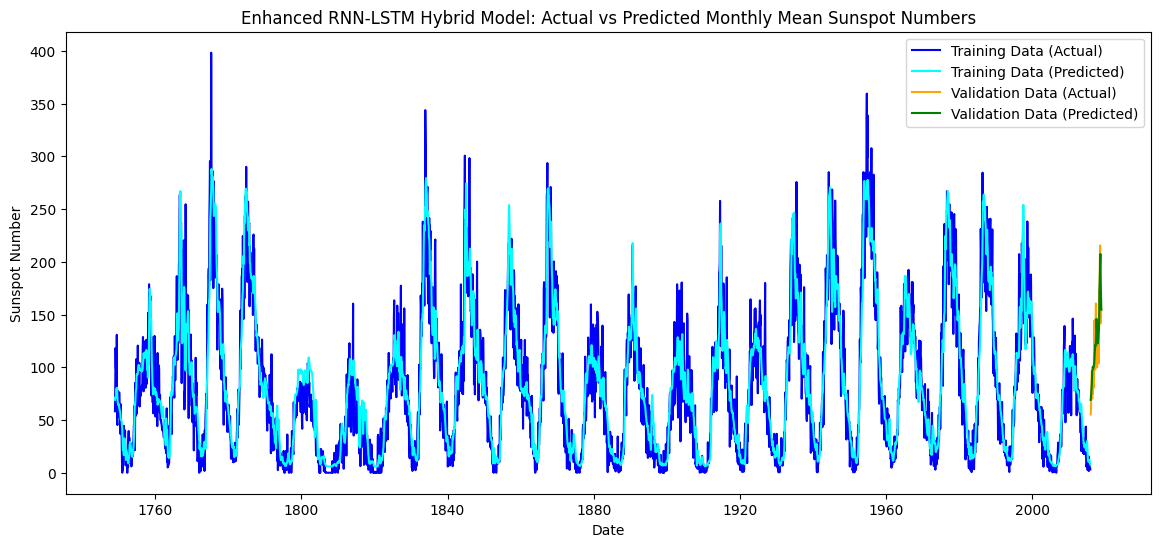

In [ ]:
train_predictions = model.predict(X_train)
val_predictions = model.predict(X_val)

train_predictions = scaler.inverse_transform(train_predictions)
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
val_predictions = scaler.inverse_transform(val_predictions)
y_val = scaler.inverse_transform(y_val.reshape(-1, 1))


rmse = np.sqrt(mean_squared_error(y_val, val_predictions))
print(f'Validation RMSE: {rmse:.2f}')

# Plot results
plt.figure(figsize=(14, 6))

# Plot training predictions
plt.plot(monthly_data.index[:len(y_train)], y_train, label='Training Data (Actual)', color='blue')
plt.plot(monthly_data.index[:len(train_predictions)], train_predictions, label='Training Data (Predicted)', color='cyan')

# Plot validation predictions
validation_index = monthly_data.index[len(y_train): len(y_train) + len(val_predictions)]
plt.plot(validation_index, y_val, label='Validation Data (Actual)', color='orange')
plt.plot(validation_index, val_predictions, label='Validation Data (Predicted)', color='green')

plt.title('Enhanced RNN-LSTM Hybrid Model: Actual vs Predicted Monthly Mean Sunspot Numbers')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.legend()
plt.show()